In [ ]:
import zipfile

from PIL import Image
import pytesseract
import cv2 as cv
import numpy as np
from IPython.display import display
import cv2 as cv
from PIL import ImageDraw
import PIL


# loading the face detection classifier
face_cascade = cv.CascadeClassifier('readonly/haarcascade_frontalface_default.xml')


# SCANNED PAGES ARE TOO BIG FOR GITHUB, PLEASE USE THIS LINK IF YOU WANT TO DOWNLOAD THE SAMPLE 
# https://drive.google.com/file/d/1FJ5V7bo3bYzWqLUA27WgDvwMWkVRuJuM/view?usp=sharing


# UNZIP THE COMPRESSED FILE
file = zipfile.ZipFile("images.zip", "r")
with zipfile.ZipFile("images.zip", 'r') as zip_ref:
    zip_ref.extractall("imagesbig/")

In [ ]:
# THIS IS THE MAIN FUNCTION.
def keyword(word):
    
    for name in file.namelist():
        filelocation='imagesbig/'+name
        ocr = Image.open(filelocation)


        # OCR THE IMAGE TO IDENTIFY TEXT
        text = pytesseract.image_to_string(ocr)


        if word not in text:
            print("No key word found in file ", name)
        else:
            # THE MAIN PART OF THE FACE DETECTION LOOP
            print("Results found in file ", name)


            # LOAD THE CLASSIFIER 
            face_cascade = cv.CascadeClassifier('readonly/haarcascade_frontalface_default.xml')
            eye_cascade = cv.CascadeClassifier('readonly/haarcascade_eye.xml')
            cv_img = cv.imread(filelocation)
            cv_img = cv.cvtColor(cv_img, cv.COLOR_BGR2GRAY)


            # PARSE THE IMAGE TO DETECT FACES(1.35 found to be the sweet spot)
            faces = face_cascade.detectMultiScale(cv_img,1.35)
            #drawing=ImageDraw.Draw(ocr)


            # THE FOLLOWING SECTION IS FOR THE DISPLAY OUTPUT
            hm=0
            wm=0
            for x,y,w,h in faces:
                if wm<w:
                    wm=w
                if hm<h:
                    hm=h
            #first_image=faces[0]
            #help(PIL.Image.new)
            contact_sheet3=PIL.Image.new('RGB', (wm*7,wm))
            dim = (wm, hm)
            
            facelist=[]
            for x,y,w,h in faces:
                face1=ocr.crop((x,y,x+w,y+h))
                facelist.append(face1)
            x=0
            y=0

            if facelist==[]:
                print("no face in this page", name)
            else:
                contact_sheet3=PIL.Image.new('RGB', (wm*len(facelist),wm))
                for face in facelist:
                    contact_sheet3.paste(face,(x,y))
                    x=x+wm                               
                display(contact_sheet3)

Results found in file  a-0.png


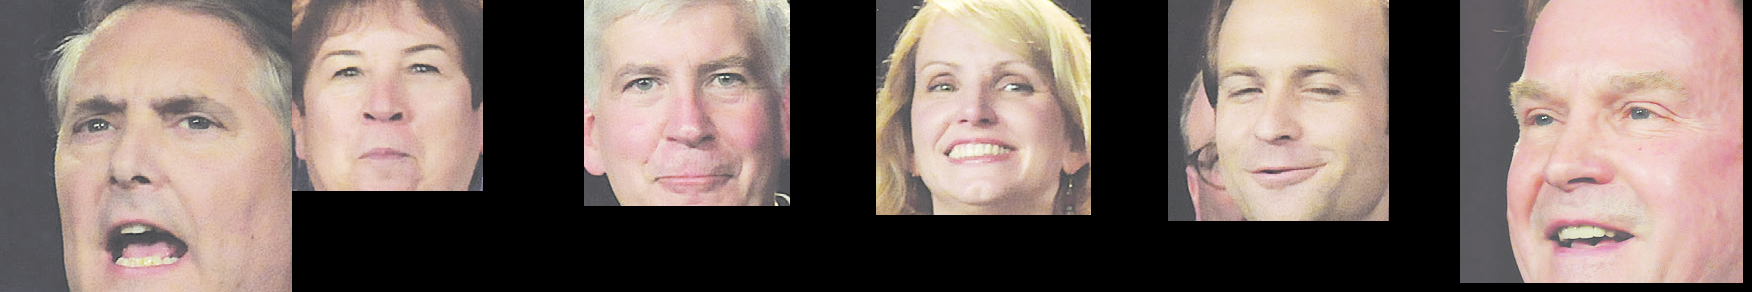

Results found in file  a-1.png


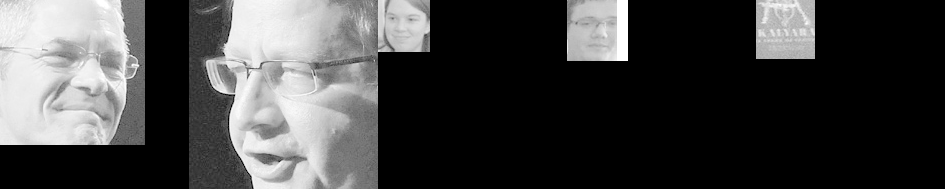

Results found in file  a-10.png
no face in this page a-10.png
No key word found in file  a-11.png
No key word found in file  a-12.png
Results found in file  a-13.png


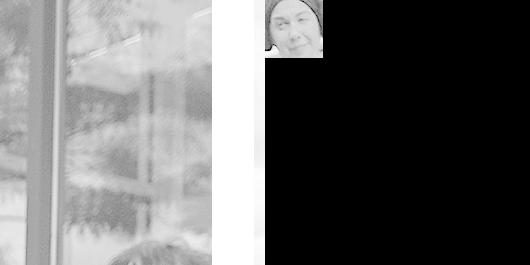

Results found in file  a-2.png


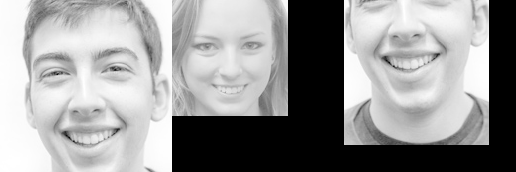

Results found in file  a-3.png


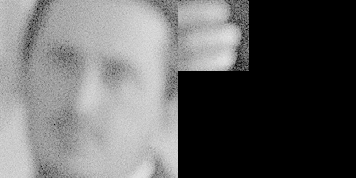

No key word found in file  a-4.png
No key word found in file  a-5.png
No key word found in file  a-6.png
No key word found in file  a-7.png
Results found in file  a-8.png


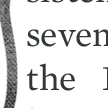

No key word found in file  a-9.png


In [ ]:
# USE THIS FUNCTION TO TYPE THE KEYWORD,AND GET THE RESULTS
keyword('Mark')

In [ ]:
print('test')

test
